<a href="https://colab.research.google.com/github/gabmck/cs4410/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabrielle McKeever\
CS 4410 XTIA\
Homework 4\
Exercise 15.17

15.17 (Binary Classification with the Breast Cancer Dataset) Check out the Breast Cancer Wisconsin Diagnostic dataset that’s bundled with scikit-learnThe dataset contains 569 samples, each with 30 features and a label indicating whether a tumor was malignant (0) or benign (1). There are only two labels, so this dataset is commonly used to perform binary classification. Using this dataset, reimplement the steps of this chapter’s classification case study in Sections 15.2–15.3. Use the  (short for Gaussian Naive Bayes) estimator. When you execute multiple classifiers (as in Section 15.3.3) to determine which one is best for the Breast Cancer Wisconsin Diagnostic dataset, include a  classifier in the  dictionary. Logistic regression is another popular algorithm for binary classification.

In [1]:
#import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#ioading the dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() #initializes variable

In [3]:
#checking the sample and target sizes

print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### * From notes:
* Convention:
    * **Uppercase `X`** represents **samples**
    * **Lowercase `y`** represents **target values**

In [12]:
#splitting the data for training and testing

x = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=11) #random_state for reproducibility


### * From notes:
* **By default**, `train_test_split` reserves **75%** of the data for **training** and **25%** for **testing**

* In **scikit-learn**, **models** are called **estimators**
* **`KNeighborsClassifier`** estimator implements the **k-nearest neighbors algorithm**

In [16]:
#training and testing set sizes

x_train.shape

(455, 30)

In [17]:
x_test.shape

(114, 30)

In [18]:
#creating the model

from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()

In [21]:
#training the model

NB_model.fit(x_train, y_train)

GaussianNB()

In [23]:
#predictions

predicted = NB_model.predict(x_test)

In [24]:
expected = y_test

In [29]:
#estimated method score

print(f'Prediction Accuracy: {NB_model.score(x_test, y_test):.2%}')


Prediction Accuracy: 93.86%


In [30]:
#confusion matrix

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(expected, predicted)

In [32]:
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[32  6]
 [ 1 75]]


In [51]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(expected, predicted, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.97      0.84      0.90        38
      benign       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



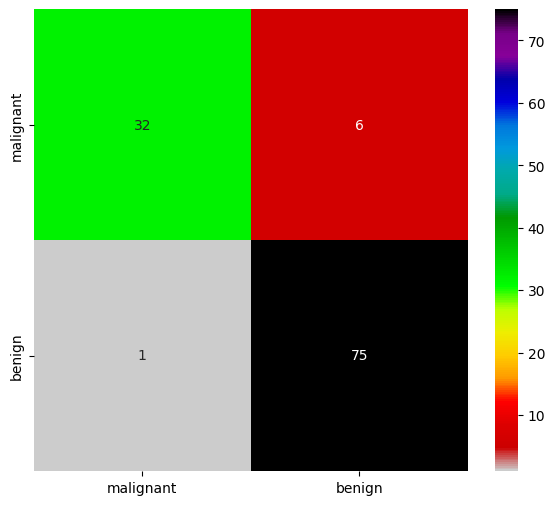

In [56]:
#visualizing confusion matrix

confusion_df = pd.DataFrame(confusion, index=cancer.target_names, columns=cancer.target_names)

import seaborn as sns

figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, cmap=plt.cm.nipy_spectral_r)


In [59]:
#k-fold cross validation

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=NB_model, X=cancer.data,
          y=cancer.target, cv=kfold)

print(f'Mean accuracy: {scores.mean():.2%}')


Mean accuracy: 93.85%


In [60]:
#running mult models to find the best one

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
estimators = {
    'GaussianNB': NB_model,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [66]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=cancer.data, y=cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression: mean accuracy=95.08%; standard deviation=3.02%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
